In [8]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import collections

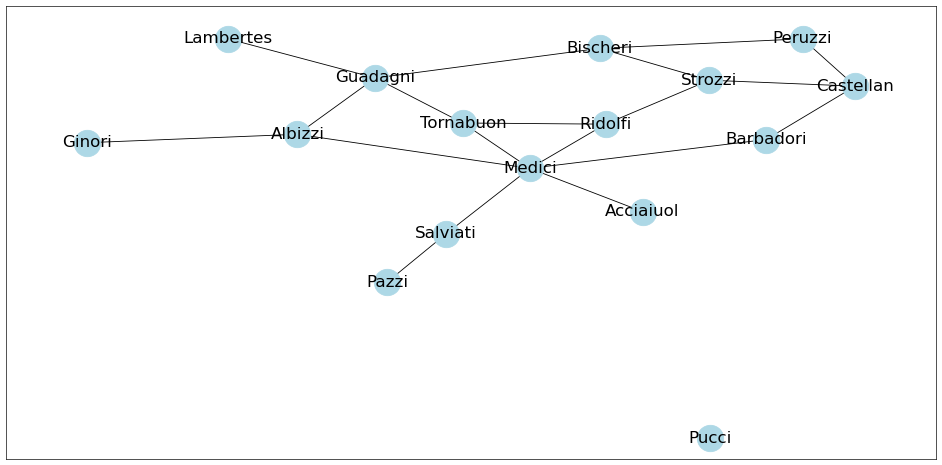

In [2]:
# social network, Florentine families begin 15th century
families = ['Pucci', 'Peruzzi', 'Bischeri', 'Guadagni', 'Lambertes',
           'Castellan', 'Strozzi', 'Ridolfi', 'Tornabuon', 'Albizzi', 'Barbadori', 'Medici',
           'Ginori', 'Acciaiuol', 'Salviati', 'Pazzi']
connections = [
    ('Peruzzi', 'Bischeri'), ('Peruzzi', 'Castellan'),
    ('Bischeri', 'Strozzi'), ('Bischeri', 'Guadagni'),
    ('Guadagni', 'Tornabuon'), ('Guadagni', 'Lambertes'),
    ('Castellan', 'Strozzi'), ('Castellan', 'Barbadori'),
    ('Strozzi', 'Ridolfi'),
    ('Ridolfi', 'Tornabuon'), ('Ridolfi', 'Medici'),
    ('Tornabuon', 'Medici'),
    ('Albizzi', 'Medici'), ('Albizzi', 'Ginori'), ('Albizzi', 'Guadagni'),
    ('Barbadori', 'Medici'),
    ('Medici', 'Acciaiuol'), ('Medici', 'Salviati'),
    ('Salviati', 'Pazzi')
]

G = nx.Graph()
G.add_nodes_from(families)
G.add_edges_from(connections)

pos=nx.spring_layout(G, seed=2, scale=4, dim=2)

fig = plt.figure(1, figsize=(20, 10), dpi=60)
nx.draw_networkx(G, pos, node_size=1000, font_size=20, node_color='lightblue')

plt.show()

You can make a <a href="#histogram">**histogram or rank plot**</a> with the frequency of degrees.

**<a href="#degree_corr">Degree correlation</a>**: let $G$ be a simple graph with degree sequence $d = [d_1, d_2, ..., d_n]$ and adjacency matrix $A$. Let $V(G) = \{v_1, v_2, ..., v_n\}$ be such that $\delta(v_i) = d_i$. $r_{deg}(G) = \frac{\Sigma^n_{i=1} \Sigma^n_{j=i+1} ((d_i - \bar d)(d_j - \bar d) \cdot A[i, j])}{\Sigma^n_{i=1}(d_i - \bar d)^2}$ where $\bar d = \frac{1}{n} \Sigma^n_{i=1}d_i$

**Scale-freeness**: Let $G$ be a simple graph with degree sequence $[d_1, d_2, ..., d_n]$ and adjacency matrix $A$. Let $V(G) = \{v_1, v_2, ..., v_n\}$ be such that $\delta (v_i) = d_i$. $s(G) = \Sigma^n_{i=1} \Sigma^n_{j=i+1} (d_i \cdot d_j \cdot A[i, j])$. The normalized version can be found in the book. Values are larger when vertices are connected to each other.

<span id="histogram"></span>

#### Histogram

In [6]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_sequence

[6, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 0]

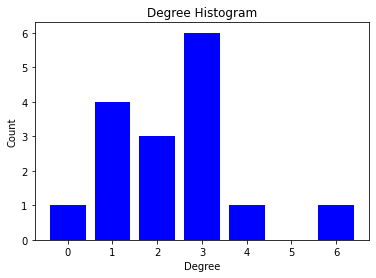

In [16]:
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

plt.bar(deg, cnt, color='b')
plt.title('Degree Histogram')
plt.xlabel('Degree')
plt.ylabel('Count')

plt.show()

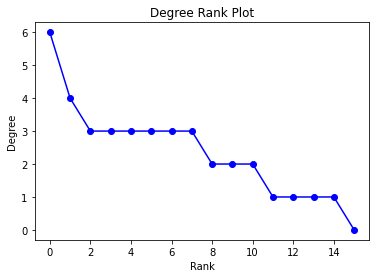

In [20]:
plt.plot(degree_sequence, 'b-', marker='o')
plt.title('Degree Rank Plot')
plt.ylabel('Degree')
plt.xlabel('Rank')

plt.show()

In [21]:
degree_sequence

[6, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 0]

In [22]:
len(degree_sequence)

16

<span id="degree_corr"></span>

#### Degree correlation

Something is going wrong here :)

In [23]:
nx.degree_pearson_correlation_coefficient(G)

-0.3279569892473118

In [24]:
degree_avg = sum(degree_sequence) / len(degree_sequence)
degree_avg

2.375

In [30]:
A = nx.to_numpy_array(G)

In [47]:
n = len(degree_sequence)

total = 0
for i in range(n):
    for j in range(1, n):
        total += (degree_sequence[i] - degree_avg) * (degree_sequence[j] - degree_avg) * A[i, j]
        
total

22.59375

In [46]:
denominator = 0
for i in range(n):
    denominator += (degree_sequence[i] - degree_avg)**2
    
denominator

31.75

In [38]:
total / denominator

0.7116141732283464